Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [2]:
# Defining the path for train and test images
data_dir_train = pathlib.Path(r"C:\Users\User\Python\IIITB\CNN Melanoma Assignment\CNN_assignment\Data\Train")
data_dir_test = pathlib.Path(r"C:\Users\User\Python\IIITB\CNN Melanoma Assignment\CNN_assignment\Data\Test")

In [3]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


The input dataset has already been splitted in 2 subsets, namely training and testing which has above images in each folder

### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [4]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [5]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [6]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [7]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
num_classes = len(class_names)
print("Name of Output Image Classifiers: ",class_names)

Name of Output Image Classifiers:  ['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

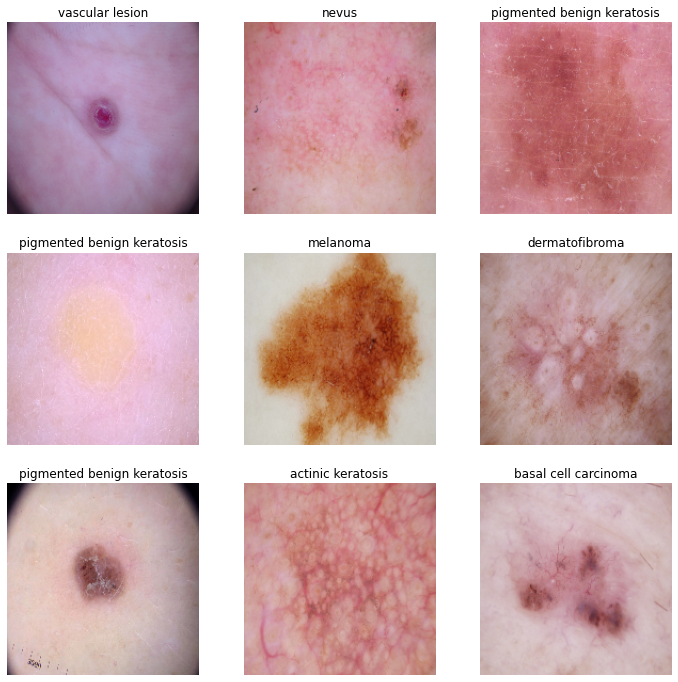

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint16"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [9]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [10]:
#preprocessing_layers = [keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180, 180, 3))]

In [11]:
# input shape = (img_rows, img_cols, channels)
model = Sequential()
model.add(keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180, 180, 3)))
# first layer
model.add(Conv2D(32, kernel_size=(3,3),padding="same",activation='relu',input_shape=(180, 180, 3))) 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# second layer
model.add(Conv2D(64, kernel_size=(3, 3),padding="same",activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# third layer
model.add(Conv2D(64, kernel_size=(3, 3),padding="same",activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# fourth layer
model.add(Conv2D(128, kernel_size=(5, 5),padding="same",activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# fifth layer
model.add(Conv2D(128, kernel_size=(5, 5),padding="same",activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# sixth layer
model.add(Conv2D(256, kernel_size=(3, 3),padding="same",activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# flatten and put a fully connected layer
model.add(Flatten())
model.add(Dense(128, activation='relu')) # fully connected
# softmax layer
model.add(Dense(9,activation='softmax'))

### Compile the model
Choose an appropriate optimiser and loss function for model training 

In [12]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [13]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 90, 90, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 45, 45, 64)        0

### Train the model

In [14]:
epochs = 20
batch_size = 32
history = model.fit(train_ds, batch_size=batch_size ,epochs=20, verbose=1, validation_data=test_ds)

Epoch 1/20
56/56 [==============================] - 71s 1s/step - loss: 2.0597 - accuracy: 0.1920 - val_loss: 2.0389 - val_accuracy: 0.2058
Epoch 2/20
56/56 [==============================] - 63s 1s/step - loss: 2.0197 - accuracy: 0.1953 - val_loss: 2.0300 - val_accuracy: 0.1790
Epoch 3/20
56/56 [==============================] - 61s 1s/step - loss: 2.0049 - accuracy: 0.2015 - val_loss: 1.9360 - val_accuracy: 0.1924
Epoch 4/20
56/56 [==============================] - 65s 1s/step - loss: 1.8951 - accuracy: 0.2706 - val_loss: 1.7964 - val_accuracy: 0.3199
Epoch 5/20
56/56 [==============================] - 63s 1s/step - loss: 1.7391 - accuracy: 0.3544 - val_loss: 1.6851 - val_accuracy: 0.4027
Epoch 6/20
56/56 [==============================] - 63s 1s/step - loss: 1.6508 - accuracy: 0.3912 - val_loss: 1.6185 - val_accuracy: 0.4273
Epoch 7/20
56/56 [==============================] - 64s 1s/step - loss: 1.5829 - accuracy: 0.4275 - val_loss: 1.5950 - val_accuracy: 0.4228
Epoch 8/20
56/56 [==

### Visualizing training results

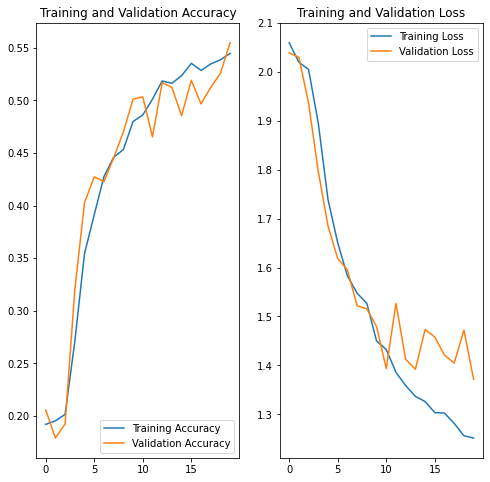

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit
  - The training accuracy & the validation accuracy, both happens to be increasing steadily & are pretty close which is good
  - However the overall accuracy percentages (for both) are not very encouraging, and clearly a case of underfitting 
  - For losses we could see some jumps here and there for validation data, while for training data the decline is pretty smooth

### Write your findings here

In [16]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, 
# choose an appropriate data augumentation strategy. 
data_augmentation = tf.keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomContrast(0.1),
    layers.experimental.preprocessing.RandomRotation(0.3),
    layers.experimental.preprocessing.RandomZoom(0.2)
  ]
)

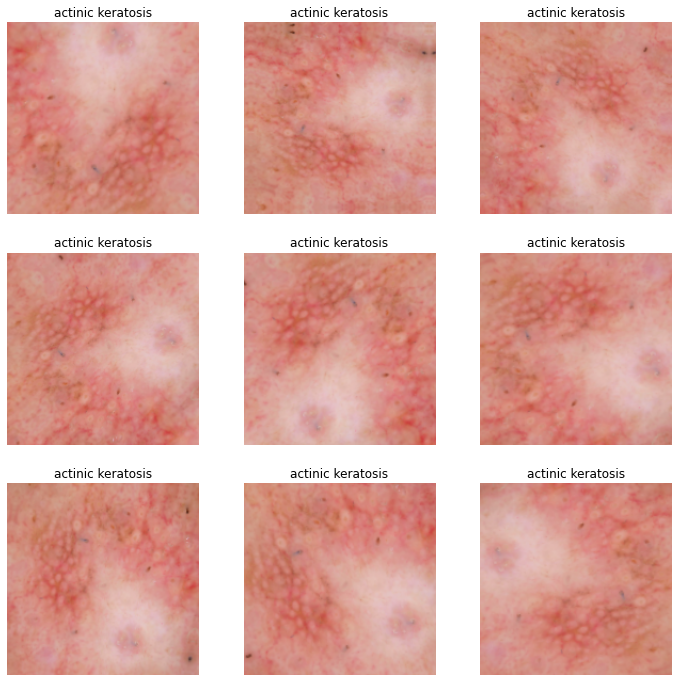

In [17]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
    for i in range(9):
        img = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(img[1].numpy().astype("uint16"))
        plt.axis("off")
        plt.title(class_names[labels[1]])

### Todo:
### Create the model, compile and train the model


In [18]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

# input shape = (img_rows, img_cols, channels)
model = Sequential()
model.add(keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180, 180, 3)))

# adding augmented images
model.add(data_augmentation)

# first layer
model.add(Conv2D(32, kernel_size=(3,3),padding="same",activation='relu',input_shape=(180, 180, 3))) 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# second layer
model.add(Conv2D(64, kernel_size=(3, 3),padding="same",activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# third layer
model.add(Conv2D(64, kernel_size=(3, 3),padding="same",activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# fourth layer
model.add(Conv2D(128, kernel_size=(5, 5),padding="same",activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# fifth layer
model.add(Conv2D(128, kernel_size=(5, 5),padding="same",activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# sixth layer
model.add(Conv2D(256, kernel_size=(3, 3),padding="same",activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# flatten and put a fully connected layer
model.add(Flatten())
model.add(Dense(128, activation='relu')) # fully connected
# softmax layer
model.add(Dense(9,activation='softmax'))

### Compiling the model

In [19]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [20]:
# model summary (trainable / non-trainable parameters)
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 180, 180, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 90, 90, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 90, 90, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 90, 90, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 45, 45, 64)       

### Training the model

In [21]:
epochs = 20
batch_size = 32
history = model.fit(train_ds, batch_size=batch_size ,epochs=20, verbose=1, validation_data=test_ds)

Epoch 1/20
56/56 [==============================] - 67s 1s/step - loss: 2.0726 - accuracy: 0.1981 - val_loss: 2.0753 - val_accuracy: 0.1924
Epoch 2/20
56/56 [==============================] - 67s 1s/step - loss: 2.0241 - accuracy: 0.1992 - val_loss: 2.0232 - val_accuracy: 0.2058
Epoch 3/20
56/56 [==============================] - 67s 1s/step - loss: 1.9599 - accuracy: 0.2494 - val_loss: 1.8940 - val_accuracy: 0.2931
Epoch 4/20
56/56 [==============================] - 66s 1s/step - loss: 1.7820 - accuracy: 0.3331 - val_loss: 1.6939 - val_accuracy: 0.3803
Epoch 5/20
56/56 [==============================] - 67s 1s/step - loss: 1.7128 - accuracy: 0.3616 - val_loss: 1.6383 - val_accuracy: 0.4251
Epoch 6/20
56/56 [==============================] - 69s 1s/step - loss: 1.6328 - accuracy: 0.4012 - val_loss: 1.6659 - val_accuracy: 0.4004
Epoch 7/20
56/56 [==============================] - 67s 1s/step - loss: 1.5865 - accuracy: 0.4347 - val_loss: 1.5682 - val_accuracy: 0.4653
Epoch 8/20
56/56 [==

### Visualizing the results

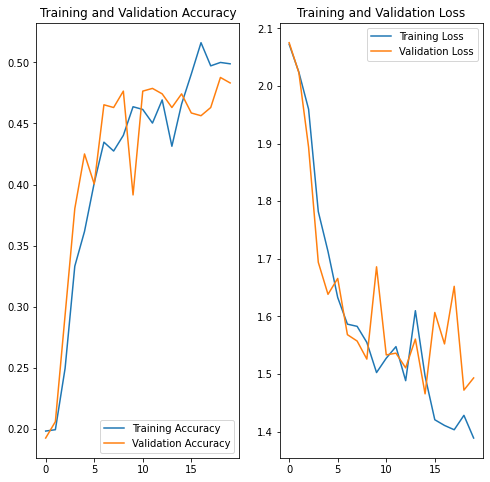

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

#### Findings:
   -  The training accuracy & the validation accuracy are quite close compared to before augmenting images which is a good indication of improvement, however our accuracy percentages are still low, which needs more epochs to improve. 
    

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [23]:
# images in each classes
class_diff=pd.DataFrame()
for i in range(len(class_names)):
    name= class_names[i]
    number = int(len(list(data_dir_train.glob(f'{class_names[i]}/*.jpg'))))
    class_diff=class_diff.append({'class':name,'number':number},ignore_index=True)

class_diff.sort_values(by='number',inplace=True)
class_diff

,class,number
6,seborrheic keratosis,77.0
2,dermatofibroma,95.0
0,actinic keratosis,114.0
8,vascular lesion,139.0
7,squamous cell carcinoma,181.0
4,nevus,357.0
1,basal cell carcinoma,376.0
3,melanoma,438.0
5,pigmented benign keratosis,462.0


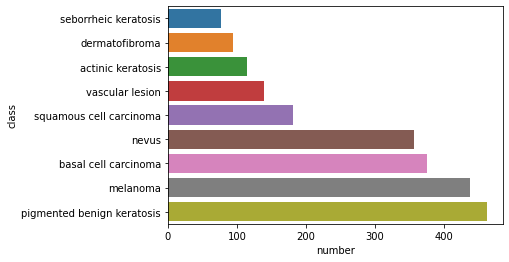

In [24]:
sns.barplot(x=class_diff['number'],y=class_diff['class'],orient='h')
#plt.xticks(rotation=90)
#plt.tight_layout()
plt.show()

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
      Answer - seborrheic keratosis with 77 images 
#### - Which classes dominate the data in terms proportionate number of samples?
      Answer - pigmented benign keratosis with 462 images


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [25]:
import Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [26]:
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [27]:
path_to_training_dataset = r'C:/Users/User/Python/IIITB/CNN Melanoma Assignment/CNN_assignment/Data/Train/'
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1D4811BE820>:   3%| | 13/500 [00:00<00:48,  9.97 Samples/s

Initialised with 114 image(s) found.
Output directory set to C:/Users/User/Python/IIITB/CNN Melanoma Assignment/CNN_assignment/Data/Train/actinic keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1D481249160>: 100%|█| 500/500 [00:04<00:
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1D481155D00>:   2%| | 11/500 [00:00<00:58,  8.42 Samples/s

Initialised with 376 image(s) found.
Output directory set to C:/Users/User/Python/IIITB/CNN Melanoma Assignment/CNN_assignment/Data/Train/basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1D488F6A490>: 100%|█| 500/500 [00:04<00:00, 107.07 Samples
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1D481249130>:   0%| | 2/500 [00:00<01:12,  6.85 Samples/s]

Initialised with 95 image(s) found.
Output directory set to C:/Users/User/Python/IIITB/CNN Melanoma Assignment/CNN_assignment/Data/Train/dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1D4861C75B0>: 100%|█| 500/500 [00:05<00:00, 98.28 Samples/
Executing Pipeline:   0%|                                                                | 0/500 [00:00<?, ? Samples/s]

Initialised with 438 image(s) found.
Output directory set to C:/Users/User/Python/IIITB/CNN Melanoma Assignment/CNN_assignment/Data/Train/melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1D4FF3E2910>: 100%|█| 500/500 [00:24<00:00, 20.33 Samples
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=767x576 at 0x1D481211E50>:   0%| | 0/500 [00:00<?, ? 

Initialised with 357 image(s) found.
Output directory set to C:/Users/User/Python/IIITB/CNN Melanoma Assignment/CNN_assignment/Data/Train/nevus\output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x1D4810E9220>: 100%|█| 500/500 [00:24<00:00, 20.19 Samples/
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1D481449EB0>:   3%| | 14/500 [00:00<00:58,  8.30 Samples/s

Initialised with 462 image(s) found.
Output directory set to C:/Users/User/Python/IIITB/CNN Melanoma Assignment/CNN_assignment/Data/Train/pigmented benign keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1D4811E02B0>: 100%|█| 500/500 [00:04<00:
Executing Pipeline:   0%|                                                                | 0/500 [00:00<?, ? Samples/s]

Initialised with 77 image(s) found.
Output directory set to C:/Users/User/Python/IIITB/CNN Melanoma Assignment/CNN_assignment/Data/Train/seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1D4861A5DF0>: 100%|█| 500/500 [00:11<00:00, 42.70 Samples
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1D48178BA90>:   1%| | 5/500 [00:00<01:12

Initialised with 181 image(s) found.
Output directory set to C:/Users/User/Python/IIITB/CNN Melanoma Assignment/CNN_assignment/Data/Train/squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1D481133EE0>: 100%|█| 500/500 [00:05<00:00, 97.92 Samples/
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1D48196A4F0>:   1%| | 7/500 [00:00<01:06,  7.41 Samples/s]

Initialised with 139 image(s) found.
Output directory set to C:/Users/User/Python/IIITB/CNN Melanoma Assignment/CNN_assignment/Data/Train/vascular lesion\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1D48117D040>: 100%|█| 500/500 [00:04<00:


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [28]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [29]:
from glob import glob
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

['C:\\Users\\User\\Python\\IIITB\\CNN Melanoma Assignment\\CNN_assignment\\Data\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_03ef3293-13c7-4ce5-bcba-051f0df0596b.jpg',
 'C:\\Users\\User\\Python\\IIITB\\CNN Melanoma Assignment\\CNN_assignment\\Data\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_2b8b3fc7-ed28-42c3-879f-7f5cb651fe58.jpg',
 'C:\\Users\\User\\Python\\IIITB\\CNN Melanoma Assignment\\CNN_assignment\\Data\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_31255eb3-b986-4416-a64a-b03ba2d069c7.jpg',
 'C:\\Users\\User\\Python\\IIITB\\CNN Melanoma Assignment\\CNN_assignment\\Data\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_4bf521b1-83a4-442e-862c-c23b2df2d3bc.jpg',
 'C:\\Users\\User\\Python\\IIITB\\CNN Melanoma Assignment\\CNN_assignment\\Data\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_97f8e3f2-eb26-4118-a8ff-198324009

In [30]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [31]:
#dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [32]:
path = r'C:/Users/User/Python/IIITB/CNN Melanoma Assignment/CNN_assignment/Data/Train/'
for i in class_names:
    directory =path
    directory_out =path+'/'+i+'/output/'
    class_directory = pathlib.Path(directory)
    class_directory_out = pathlib.Path(directory_out)
    length=len(list(class_directory.glob(i+'/*.jpg')))
    length_out=len(list(class_directory_out.glob('*.jpg')))
    length_tot=length+length_out
    print(f'{i} has {length_tot} samples.')

actinic keratosis has 614 samples.
basal cell carcinoma has 876 samples.
dermatofibroma has 595 samples.
melanoma has 938 samples.
nevus has 857 samples.
pigmented benign keratosis has 962 samples.
seborrheic keratosis has 577 samples.
squamous cell carcinoma has 681 samples.
vascular lesion has 639 samples.


So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [33]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [34]:
data_dir_train=r'C:/Users/User/Python/IIITB/CNN Melanoma Assignment/CNN_assignment/Data/Train/'
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [35]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [36]:
model = Sequential()
model.add(keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180, 180, 3)))
# first layer
model.add(Conv2D(32, kernel_size=(3,3),padding="same",activation='relu',input_shape=(180, 180, 3))) 
model.add(MaxPooling2D(pool_size=(2, 2)))
# second layer
model.add(Conv2D(64, kernel_size=(3, 3),padding="same",activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# third layer
model.add(Conv2D(128, kernel_size=(3, 3),padding="same",activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# fourth layer
model.add(Conv2D(128, kernel_size=(5, 5),padding="same",activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# fifth layer
model.add(Conv2D(256, kernel_size=(7, 7),padding="same",activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# sixth layer
model.add(Conv2D(256, kernel_size=(3, 3),padding="same",activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
# flatten and put a fully connected layer
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
# softmax layer
model.add(Dense(9,activation='softmax'))

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [37]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_2 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 180, 180, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 90, 90, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 90, 90, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 45, 45, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 45, 45, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 22, 22, 128)      

#### **Todo:**  Train your model

In [38]:
epochs = 50
batch_size = 32
history = model.fit(train_ds, batch_size=batch_size ,epochs=epochs, verbose=1, validation_data=test_ds)

Epoch 1/50
169/169 [==============================] - 257s 2s/step - loss: 2.1874 - accuracy: 0.1358 - val_loss: 2.1853 - val_accuracy: 0.1403
Epoch 2/50
169/169 [==============================] - 255s 2s/step - loss: 2.1726 - accuracy: 0.1445 - val_loss: 2.1093 - val_accuracy: 0.1975
Epoch 3/50
169/169 [==============================] - 247s 1s/step - loss: 1.9924 - accuracy: 0.2155 - val_loss: 1.9749 - val_accuracy: 0.2183
Epoch 4/50
169/169 [==============================] - 249s 1s/step - loss: 1.8651 - accuracy: 0.2476 - val_loss: 1.8842 - val_accuracy: 0.2383
Epoch 5/50
169/169 [==============================] - 246s 1s/step - loss: 1.7508 - accuracy: 0.2901 - val_loss: 1.7239 - val_accuracy: 0.3155
Epoch 6/50
169/169 [==============================] - 269s 2s/step - loss: 1.7008 - accuracy: 0.3362 - val_loss: 1.6877 - val_accuracy: 0.3556
Epoch 7/50
169/169 [==============================] - 384s 2s/step - loss: 1.6775 - accuracy: 0.3492 - val_loss: 1.6231 - val_accuracy: 0.3586

#### **Todo:**  Visualize the model results

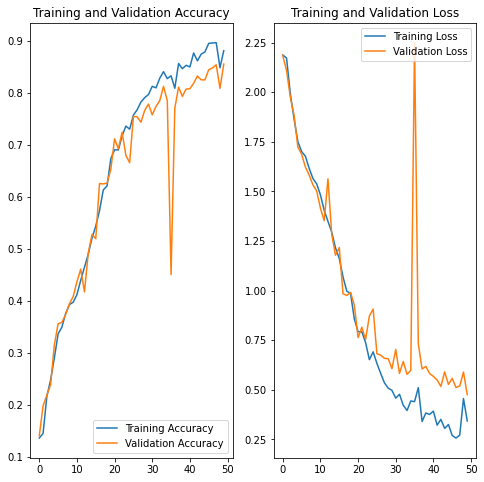

In [39]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



#### Final Analysis:
   - The training accuracy and the validation accuracy are pretty much close which is a sign of good fit.
   - Also the losses are quite close & similar jump can be observed between epochs 30-40, for accuracy & loss function, which is also a good sign & generalizes the algorithm better.
   - The Validation accuracy comes up to be 86% which is also quite good.

#### Testing the Model



Actual Class: vascular lesion
Predictive Class: vascular lesion


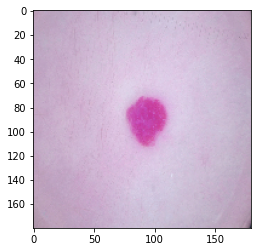

In [48]:
from glob import glob
from tensorflow.keras.preprocessing.image import load_img, img_to_array
Test_image_path = os.path.join(data_dir_test, class_names[8], '*')
Test_image = glob(Test_image_path)
Test_image = load_img(Test_image[-1],target_size=(180,180,3))
plt.imshow(Test_image)
plt.grid(False)

img = np.expand_dims(Test_image,axis=0)
pred = model.predict(img)
pred = np.argmax(pred)
pred_class = class_names[pred]
print(f"Actual Class: {class_names[8]}" + '\n' + "Predictive Class: " + pred_class)